
Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación
Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

Práctico Análisis y Visualización
Integrantes:

Objetivos:
Normalizar el corpus generado en el práctico anterior, teniendo en cuenta los siguientes aspectos:

tokenización,
pasar a minúsculas,
separar puntuación,
stemming y lematización,
eliminar stopwords (o no),
eliminar las palabras con frecuencia menor a n.
Analizar las palabras más frecuentes de todo el corpus, por fuero y de 5 documentos. Compararlo con el resultado obtenido en el ejercicio anterior. Se observa algún cambio significativo?

Hacer una explicación con ejemplos tomando algunas palabras al azar entre lo que es stemming y lemmatizing para entender que nos da cada uno de estos procesos y cual es conveniente utilizar en cada caso.

Opcional:

Investigar que es Segmentación y compararlo con Tokenización. Ejemplificar con un documento.
Investigar NER (Named Entity Recognition - Reconocimiento de Entitades Nombradas). Buscar las Entidadas Nombradas mas frecuentes en todo el corpus y por fuero.
Fecha de Entrega: 4 de julio de 2021



In [1]:
import pandas as pd
import seaborn as sns
import os
import nltk
import matplotlib.pyplot as plt

In [2]:
dirname= "Corpus.txt"

f = open (dirname,'r', encoding="utf-8")
corpus=f.read()


Hay varios tokenizadores de acuerdo a el objetivo especifico que tengamos (Completar):

-WordSentTokenize

-WordPunctTokenizer

-WordTokenize

-Un  RegexpTokenizer  divide una cadena en subcadenas usando una expresión regular. 

In [3]:
#Se generan los tokens sin signos de puntuacion
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(corpus)


Se los pasa a minuscula

In [4]:
tokens_lower = [word.lower() for word in tokens ]
tokens_lower[:20]

['auto',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'córdoba',
 'veinticuatro',
 'de',
 'septiembre',
 'de',
 'dos',
 'mil',
 'dieciocho',
 'y',
 'vistos',
 'estos',
 'autos',
 'caratulados']

Stopword el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc (como "el", "a", "una", "en") que un motor de búsqueda ha sido programado para ignorar, tanto al indexar entradas para buscarlas como al recuperarlas. como resultado de una consulta de búsqueda. 

Los stopwords aparecen por lo general en una lista de palabras, que se toma como referencia para eliminar el corpus. Nosotros utilizamos la lista de palabras que proporciona nltk y ademas bajamos un txt de https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt que contiene mas stopwords

In [5]:
file_stopwords='stopwords.txt'
f = open (file_stopwords,'r', encoding="utf-8")
stopwords_list=f.read()
#stopwords_list.replace('\n', ' ')
stopwords_tokens=tokenizer.tokenize(stopwords_list)


In [6]:
#Se les quitan los stopwords
stopwords_tokens=stopwords.words('spanish')
stopwords_tokens.extend(stopwords_tokens)

words = [token for token in tokens_lower if token not in stopwords_tokens]
words[:20]

['auto',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'córdoba',
 'veinticuatro',
 'septiembre',
 'dos',
 'mil',
 'dieciocho',
 'vistos',
 'autos',
 'caratulados',
 'm',
 'control',
 'legalidad',
 'ley']

El stemming consiste en quitar y reemplazar sufijos de la raíz de la palabra.Ej: La raíz de la palabra trabajando = > trabajo.

Los motores de búsqueda utilizan esta técnica al indexar páginas, puesto que muchas personas escriben versiones diferentes para la misma palabra y todas derivan de la palabra raíz.

Hay distintos metodos:

-PorterStemmer: Es el mas popular pero funciona mejor con palabras en Ingles

-LancasterStemmer



In [7]:
from nltk.stem import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')


# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()


tokens_stemm=[spanish_stemmer.stem(word) for word in words]
tokens_stemm[:20]

['aut',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'dos',
 'mil',
 'diecioch',
 'vist',
 'aut',
 'caratul',
 'm',
 'control',
 'legal',
 'ley']

La lemmatización implica hacer un análisis del vocabulario y su morfología para retornar la forma básica de la palabra (sin conjugar, en singular, etc).
El problema es que al menos hasta la fecha NLTK no tiene incorporada lemmatización para español.

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lem=[lemmatizer.lemmatize(word) for word in tokens_stemm]
tokens_lem[:20]


['aut',
 '122',
 't',
 '2',
 'f',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'do',
 'mil',
 'diecioch',
 'vist',
 'aut',
 'caratul',
 'm',
 'control',
 'legal',
 'ley']

In [9]:
#Limpio palabras de longitud baja
tokens_clean= [token for token in tokens_lem if len(token) > 1]
tokens_clean[:20]

['aut',
 '122',
 '547',
 '552',
 'cordob',
 'veinticuatr',
 'septiembr',
 'do',
 'mil',
 'diecioch',
 'vist',
 'aut',
 'caratul',
 'control',
 'legal',
 'ley',
 '9944',
 'art',
 '56',
 'expte']

Analisis corpus total

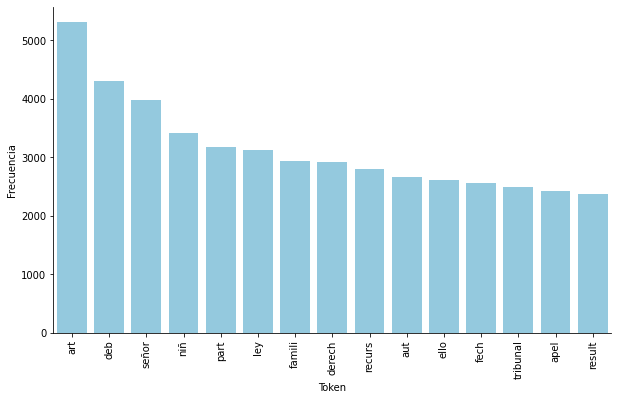

In [14]:
def tokens2dataframe(tokens):
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data
def graph_frequency(dataframe):
    plt.figure(figsize=(10,6))
    sns.barplot(x=dataframe[:15].Token, y=dataframe[:15].Frecuencia, color='skyblue')
    plt.xticks(rotation=90)
    sns.despine()
data=tokens2dataframe(tokens_clean)
graph_frequency(data)

4354

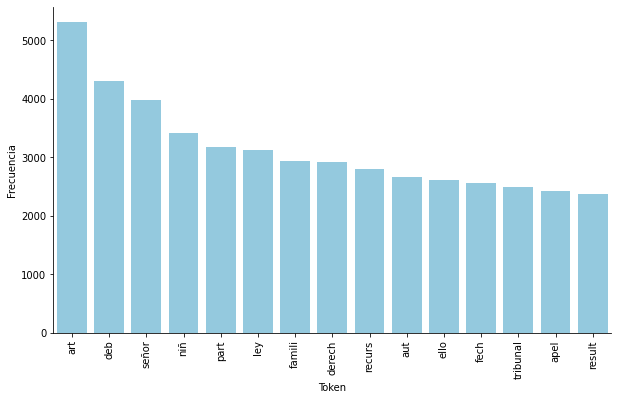

In [15]:
def delete_low_frecuency_words(dataframe, n):
    return dataframe[dataframe['Frecuencia']>n]
data= delete_low_frecuency_words(data,10)
graph_frequency(data)
len(data)

In [20]:
root=os.getcwd()
dirname=f'{root}\\Documentos'
def corpus_for_fuero(fuero):
    path_fuero=f'{dirname}\{fuero}'
    files = os.listdir(path_fuero)
    corpus=[]
    for file in files:
        path=f'{path_fuero}\{file}'
        f = open (path,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus,files
def getListOfFiles(dirName, quantity=None):
    # create a list of file and sub directories 
    # names in the given directory
    files = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    if not quantity:
        for file in files:
            # Create full path
            fullPath = dirName + "\\" + file
            # If entry is a directory then get the list of files in this directory 
            if os.path.isdir(fullPath) and not quantity:
                allFiles = allFiles + getListOfFiles(fullPath)
            else:
                allFiles.append(fullPath)
    else:
        allFiles = allFiles + getListOfFiles(dirName)[:quantity]
    return allFiles


def create_corpus(file_list):
    corpus=[]
    for file in file_list:
        f = open (file,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus

In [16]:
def clean_corpus(corpus):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(corpus)
    tokens_lower = [word.lower() for word in tokens ]
    words = [token for token in tokens_lower if token not in stopwords_tokens]
    tokens_stemm=[spanish_stemmer.stem(word) for word in words]
    tokens_lem=[lemmatizer.lemmatize(word) for word in tokens_stemm]
    tokens_clean= [token for token in tokens_lem if len(token) > 1]
    data=tokens2dataframe(tokens_clean)
    graph_frequency(data)

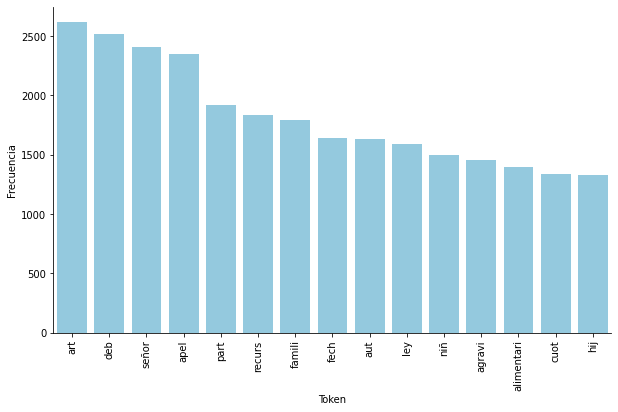

In [24]:
corpus_familia, files_familia=corpus_for_fuero('FAMILIA')
clean_corpus(corpus_familia)

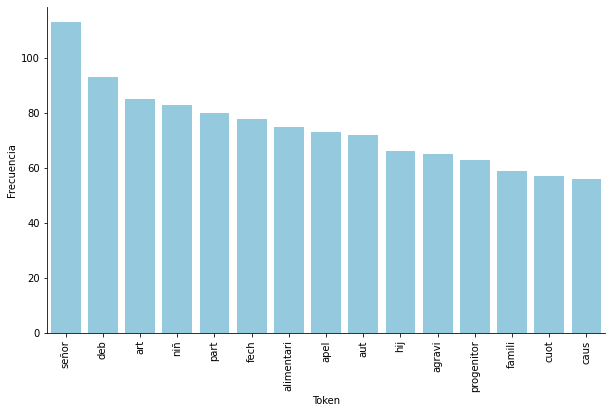

In [25]:
list_of_five_files_familia=getListOfFiles(dirname+ '\FAMILIA', 5)
corpus_five_familia=create_corpus(list_of_five_files_familia)
clean_corpus(corpus_five_familia)

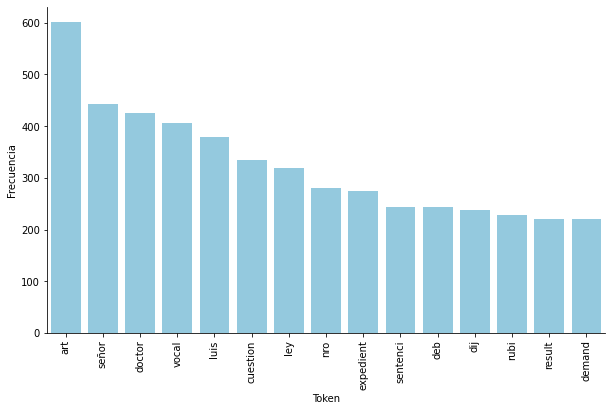

In [26]:
corpus_laboral,files_laboral=corpus_for_fuero('LABORAL')
clean_corpus(corpus_laboral)

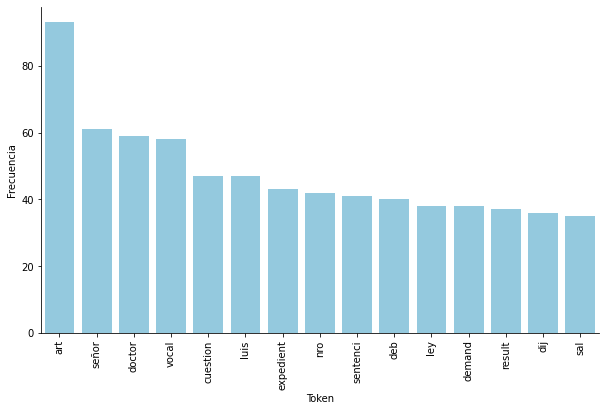

In [28]:
list_of_five_files_laboral=getListOfFiles(dirname+'\LABORAL', 5)
corpus_five_laboral=create_corpus(list_of_five_files_laboral)
clean_corpus(corpus_five_laboral)

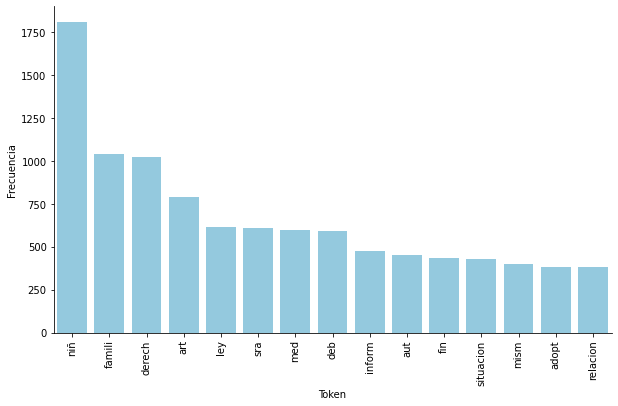

In [29]:
corpus_menores,files_menores=corpus_for_fuero('MENORES')
clean_corpus(corpus_menores)

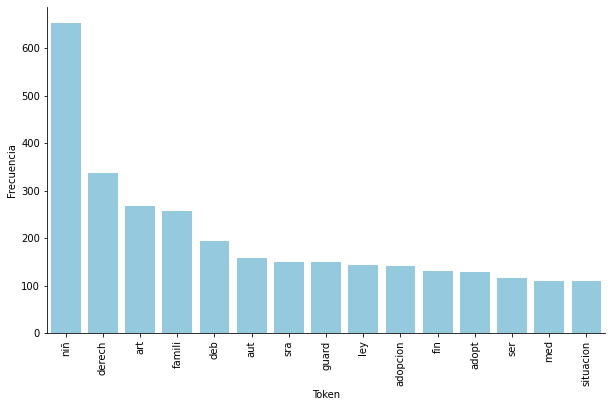

In [23]:
list_of_five_files_menores=getListOfFiles(dirname+ '\MENORES', 5)
corpus_five_menores=create_corpus(list_of_five_files_menores)
clean_corpus(corpus_five_menores)

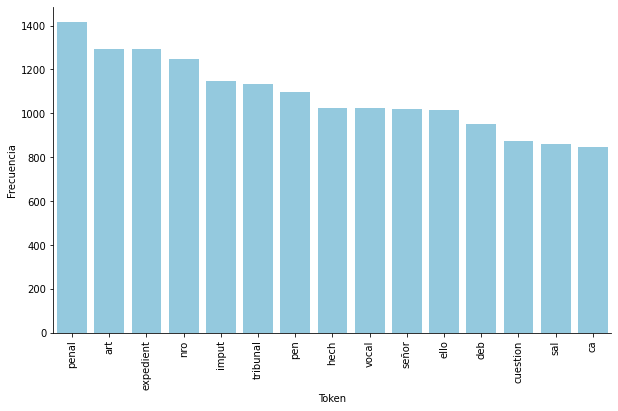

In [30]:
corpus_penal,files_penal=corpus_for_fuero('PENAL')
clean_corpus(corpus_penal)

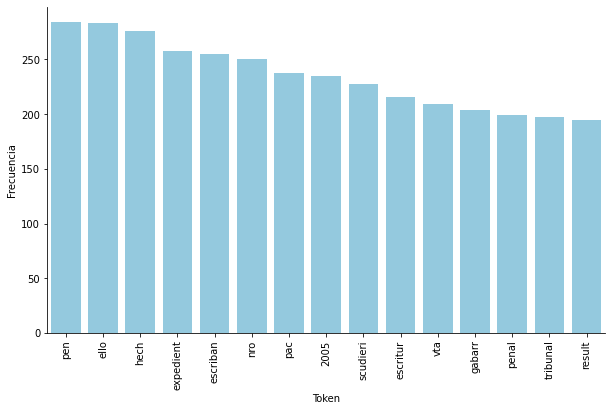

In [31]:
list_of_five_files_penal=getListOfFiles(dirname+ '\PENAL', 5)
corpus_five_penal=create_corpus(list_of_five_files_penal)
clean_corpus(corpus_five_penal)

***OPCIONAL***